# Report of TP1
- Quyi Le -- `Quyi.Le@etu.univ-grenoble-alpes.fr`
- Olesia Zaichenko -- `olesia.zaichenko@etu.univ-grenoble-alpes.fr`
- Matvei Kudashev -- `matvei.kudashev@etu.univ-grenoble-alpes.fr`

## Exercise 1: Preliminary analysis of the data

**(a)** To remove the first line and the last line, we use `df.drop` as below.

In [1]:
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
df = df.drop(axis=1, columns=df.columns[[0,-1]])
print(df.head())

     lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45      lpsa
0 -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0 -0.430783
1 -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0 -0.162519
2 -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20 -0.162519
3 -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0 -0.162519
4  0.751416  3.432373   62 -1.386294    0 -1.386294        6      0  0.371564



**(b)**
The following function, `pairplot`, is designed to visualize the relationships between all pairs of variables in a dataset (DataFrame). It creates a matrix of plots (subplots) where:
1.  **Off-diagonal plots** display scatterplots to show correlations between two different variables.
2.  **Diagonal plots** display the name of the variable corresponding to that row/column.

Below is the implementation followed by a detailed line-by-line breakdown.

**1. Setup**
- `def pairplot(df, figsize=None):`
    - Defines the function accepting a DataFrame `df` and an optional tuple `figsize` for the image dimensions.
- `if figsize is None: ...`
    - Sets a default size of `(7.10, 6.70)` inches if the user does not provide one.
- `n_vars = df.shape[1]`
    - Calculates the number of columns (variables) in the DataFrame. This determines the size of the plot matrix ($N \times N$).
- `fig, ax = plt.subplots(...)`
    - Creates the figure object (`fig`) and an array of axes objects (`ax`).
    - `nrows=n_vars, ncols=n_vars:` Creates a grid matching the number of variables.
- `plt.subplots_adjust(...)`
    - Fine-tunes the layout. `wspace` and `hspace` set the whitespace between subplots to `0.10`, while `left`, `right`, `top`, `bottom` define the margins of the entire figure. This makes the plot compact.

**2. The Iterative Loop**
- `for i in range(n_vars): and for j in range(n_vars):`
    - A nested loop creates a matrix traversal. `i` represents the row index, and `j` represents the column index.
- `axij = ax[i][j]`
    - Selects the specific subplot (axis) at row `i` and column `j`.
- `i_name` / `j_name`
    - Retrieves the column names from the DataFrame corresponding to the current row and column indices.
 
**3. Styling the Subplots**
- `axij.set_xticks([])` / `axij.set_yticks([])`
    - Removes the numerical tick marks on both the X and Y axes. This is crucial for pairplots because repeating scales for every tiny subplot would make the image cluttered and unreadable.
- `axij.margins(0.1)`
    - Adds 10% padding inside the plot so data points don't touch the edges of the box.
 
**4. Plotting Logic**
- `if i != j:` (**Off-Diagonal**)
  - Draws a Scatterplot. This allows us to visually inspect the **correlation** (positive, negative, or none) and clusters between every pair of variables.
- `else:` (**Diagonal**, where i == j)
    - Instead of plotting a scatterplot of a variable against itself (which would just be a straight line), it places **Text**. This acts as a label for the rows and columns of the matrix.
 
The picture we generate is as below:

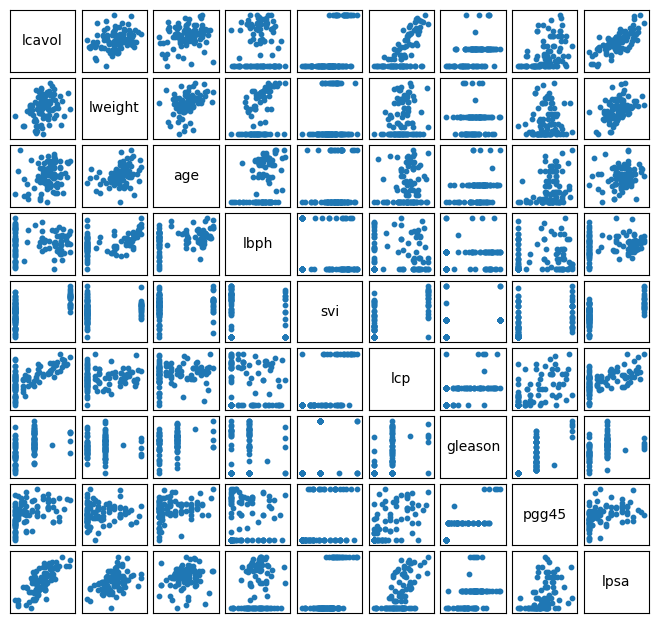

In [2]:
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()


**(c)** Based on the generated figure, `lpsa` seems the most correlated to `lcavol`. Moreover, `svi` and `gleason` are categorical(qualitative) varibles, othe predictors are continuous.

**(d)** Since we know that the formula of correlation is $$Corr(X,Y)=\frac{Cov(X,Y)}{\sqrt{Var(X)Var(Y)}},$$so the program can be implemented as below:

In [3]:
import numpy as np

def calculate_correlation(x, y):
    x = np.array(x)
    y = np.array(y)
    
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    cov = np.sum((x - x_mean) * (y - y_mean))
    
    va = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))
    
    return cov / va

However, this is a program that can only solve the situation with two vectors but `df.corr()` can calculate the correlation coefficients between all pairs of columns in the DataFrame, returning a correlation coefficient matrix.

In fact, by using `statsmodels.nonparametric.smoothers_lowess`, we can also see the trends such as the results below.

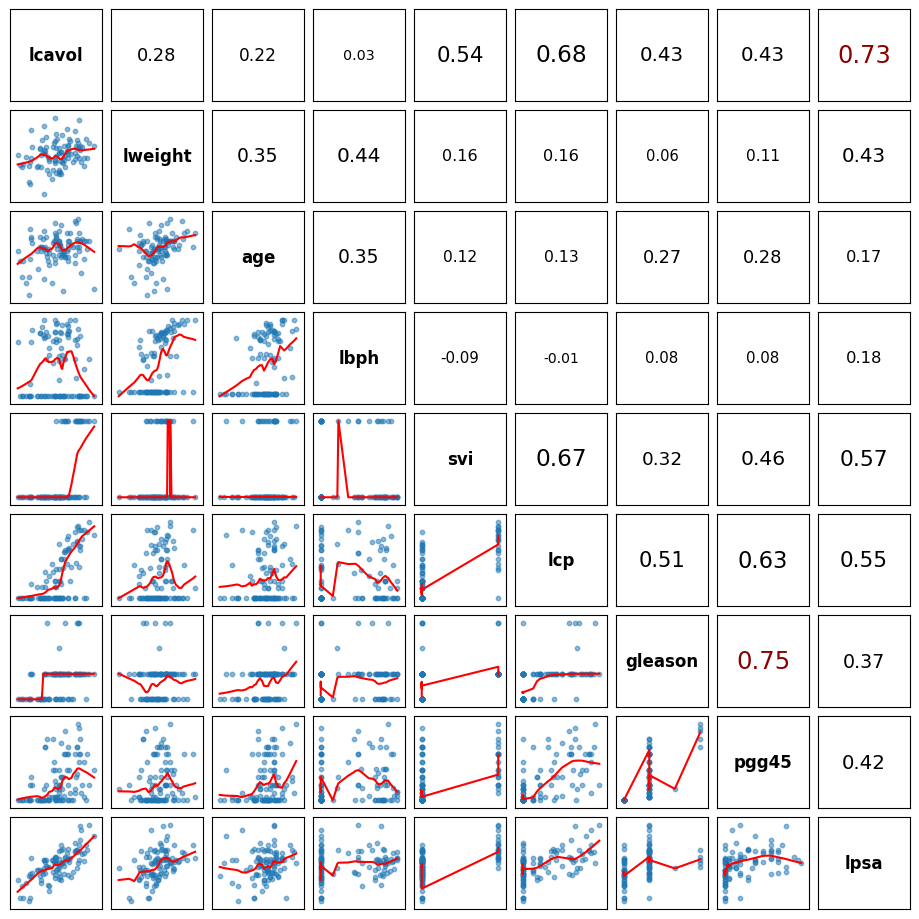

In [4]:
import statsmodels.api as sm

lowess = sm.nonparametric.lowess

def pairplot_modified(df, figsize=None):
    if figsize is None:
        figsize = (10, 10) 
        
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
        
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            
            axij.set_xticks([])
            axij.set_yticks([])
            
            if i == j:
                axij.text(0.5, 0.5, i_name, fontsize=12, fontweight='bold',
                          horizontalalignment='center',
                          verticalalignment='center',
                          transform=axij.transAxes)
            
            elif i > j: 
                x_data = df[j_name]
                y_data = df[i_name]
                
                axij.scatter(x_data, y_data, s=10, alpha=0.5)
                
                jitter = np.random.uniform(-1e-5, 1e-5, size=len(x_data))
                x_with_jitter = x_data + jitter
                try:
                    smooth_data = lowess(y_data, x_with_jitter, frac=0.3)
                    
                    axij.plot(smooth_data[:, 0], smooth_data[:, 1], color='red', linewidth=1.5)
                except:
                    pass 
                
                axij.margins(0.1)

            else: # i < j
                corr_val = df[i_name].corr(df[j_name])
                
                font_size = 10 + abs(corr_val) * 10 
                
                axij.text(0.5, 0.5, f"{corr_val:.2f}", 
                          fontsize=font_size,
                          horizontalalignment='center',
                          verticalalignment='center',
                          transform=axij.transAxes,
                          color='black' if abs(corr_val) < 0.7 else 'darkred')

    return fig, ax
    
fig, ax = pairplot_modified(df)
plt.show()

## Exercise 2: Linear regression

In [5]:
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")

**(a)**
$$\text{lcavol} = \beta_0 + \beta_1 \text{lpsa} + \beta_2 \text{lweight} + \beta_3 \text{age} + \beta_4 \text{lbph} + \beta_5 \text{lcp} + \beta_6 \text{pgg45} + \sum_{i=1}^{n-1} \gamma_i \mathbb{1}_{\text{svi}=i} + \sum_{j=1}^{m-1} \delta_j \mathbb{1}_{\text{gleason}=j} + \varepsilon$$

- `lcavol`: This is the target variable the model aims to predict.
- $\beta_0$ (Intercept): The expected value of `lcavol` when all continuous predictors are equal to zero and both categorical variables (`svi` and `gleason`) are at their respective baseline levels.
- $\beta_1, \dots, \beta_6$: These represent the expected change in the response variable (`lcavol`) for a one-unit increase in the corresponding continuous predictor (`lpsa`, `lweight`, `age`, `lbph`, `lcp`, `pgg45`), assuming all other variables in the model are held constant.
- $\gamma_i$ (Coefficients for `svi` ): The expected difference in `lcavol` between the $i$-th level of the svi category and its reference level, holding all other predictors constant.
- $\delta_j$ (Coefficients for `gleason` ): The expected difference in `lcavol` between the $j$-th level of the gleason category and its reference level, holding all other predictors constant.
- $\varepsilon$: The unobservable random error representing the variation in `lcavol` that cannot be explained by the linear combination of the predictors.

In [6]:
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']

**(b)**
1. Setting `dtype=np.float64` ensures that the generated dummy variables are explicitly stored as 64-bit floating-point numbers rather than the default booleans (True/False), so it can be used in the functions of `numpy`, `statsmodels` and etc.
2. We dropped two columns to avoid the *Dummy Variable Trap*. Since when there is a categorical variable with $k$ unique categories, it generates $k$ dummy columns and the sum of these $k$ columns will always equal exactly $1$. Because our linear regression model will also include an intercept term (a constant column of $1$s), including all $k$ dummy columns would mean that a perfect linear relationship exists between the dummy variables and the intercept, which can cause the problem.
3. We added a column of ones to the dataframe to explicitly include an intercept term in our multiple linear regression model.

In [7]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 lcavol   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     18.83
Date:                Mon, 23 Feb 2026   Prob (F-statistic):           9.05e-18
Time:                        21:27:09   Log-Likelihood:                -96.825
No. Observations:                  97   AIC:                             215.7
Df Residuals:                      86   BIC:                             244.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight       -0.0112      0.211     -0.053      0.9

**(c)**
1. The coefficients are the expected difference in `lcavol` between the $i$-th level of the svi category and its reference level, holding all other predictors constant.
2. This causes the problem that the program sees the variables as continuous variables, which means the model will assume that the influence from `gleason=6` to `gleason=7` is the same as the influence from `gleason=7` to `gleason=8`. And of course this assumption is false.
3.
-  The Adjusted $R^2$ is $0.650$, which penalizes for the number of features in the model. This represents a solid and relatively strong fit for medical and clinical data.
-  The F-statistic is $18.83$ with an associated p-value of $9.05 \times 10^{-18}$. Because this p-value is practically zero, we strongly reject the null hypothesis that all regression coefficients are zero. This proves that the model, as a whole, is highly statistically significant.
-  At a $5\%$ significance level, the variables `lcp`, `lpsa`, `age`, and `pgg45` are statistically significant.

In [8]:
conf_intervals = results.conf_int(alpha=0.05)
conf_intervals.columns = ['2.5%', '97.5%']
print("95% Confidence Intervals for Coefficients:")
print(conf_intervals)

95% Confidence Intervals for Coefficients:
               2.5%     97.5%
lweight   -0.431600  0.409107
age        0.002436  0.047129
lbph      -0.219914  0.011515
lcp        0.233639  0.571880
pgg45     -0.018469 -0.000419
lpsa       0.370474  0.728673
svi_1     -0.730029  0.289190
gleason_7 -0.116263  0.739616
gleason_8 -2.219087  0.797911
gleason_9 -0.179004  1.759273
intercept -3.145013  0.331705


**(d)**
A key rule is that if a confidence interval contains zero, it indicates that the corresponding variable is not statistically significant at the 5% level. Based on the generated intervals, predictors such as `lcp`, `lpsa`, `age`, and `pgg4`5 have confidence intervals that strictly exclude zero, confirming they are significant predictors of lcavol. This perfectly aligns with our previous $p$-value analysis.

In [9]:
lpsa_pvalue = results.pvalues['lpsa']
lpsa_conf_int = conf_intervals.loc['lpsa']

print(f"p-value for lpsa: {lpsa_pvalue}")
print(f"95% CI for lpsa: [{lpsa_conf_int['2.5%']:.4f}, {lpsa_conf_int['97.5%']:.4f}]")

p-value for lpsa: 2.9392406466908132e-08
95% CI for lpsa: [0.3705, 0.7287]


**(e)**
The variable `lpsa` exhibits a strong and statistically significant positive effect on the `lcavol`. Its estimated coefficient is roughly 0.5496, meaning that for every one-unit increase in lpsa, the `lcavol` is expected to increase by 0.5496 units, holding other variables constant.
When relating this to hypothesis testing, the $p$-value for lpsa is nearly zero, which is well below the standard 0.05 significance level, leading us to reject the null hypothesis that its coefficient is zero. Furthermore, its 95% confidence interval is strictly positive, meaning that zero is not a plausible value for this parameter at the 95% confidence level. 

In [10]:
from scipy import stats
def compute_params_and_pvalues(X, y):
    X_mat = X.to_numpy(dtype=np.float64)
    y_vec = y.to_numpy(dtype=np.float64)
    
    n, k = X_mat.shape
    
    XTX = X_mat.T @ X_mat
    XTy = X_mat.T @ y_vec
    
    beta_hat = np.linalg.solve(XTX, XTy)
    
    y_pred = X_mat @ beta_hat
    residuals = y_vec - y_pred
    rss = np.sum(residuals**2)
    df = n - k  
    sigma_squared = rss / df
    
    XTX_inv = np.linalg.inv(XTX)
    se = np.sqrt(sigma_squared * np.diag(XTX_inv))
    
    t_stats = beta_hat / se
    
    p_values = 2 * stats.t.sf(np.abs(t_stats), df)
    
    return beta_hat, p_values

beta_custom, pvals_custom = compute_params_and_pvalues(X, y)

print("Beta:")
for name, coef in zip(X.columns, beta_custom):
    print(f"{name:10}: {coef:.4f}")

print("\n P:")
for name, pval in zip(X.columns, pvals_custom):
    print(f"{name:10}: {pval:.4e}")

Beta:
lweight   : -0.0112
age       : 0.0248
lbph      : -0.1042
lcp       : 0.4028
pgg45     : -0.0094
lpsa      : 0.5496
svi_1     : -0.2204
gleason_7 : 0.3117
gleason_8 : -0.7106
gleason_9 : 0.7901
intercept : -1.4067

 P:
lweight   : 9.5771e-01
age       : 3.0150e-02
lbph      : 7.6956e-02
lcp       : 8.5779e-06
pgg45     : 4.0477e-02
lpsa      : 2.9392e-08
svi_1     : 3.9227e-01
gleason_7 : 1.5129e-01
gleason_8 : 3.5167e-01
gleason_9 : 1.0873e-01
intercept : 1.1137e-01


**(f)** First, we explain the procedure of calculating $\hat{\beta}$ and $p$
1. By OLS, we know that $\hat{\beta}$ is the solution of $$X^TX\hat{\beta}=X^Ty,$$so we know $\hat{\beta}=(X^TX)^{-1}X^Ty$.
2. Then the prediction value is $\hat{y}=X\hat{\beta}$, the residual vector is $\varepsilon=y-\hat{y}$ The RSS is the squared Euclidean norm of the residual vector:$$RSS = \sum_{i=1}^{n} \epsilon_i^2 = \epsilon^T \epsilon.$$To estimate the variance of the unobservable error term ($\sigma^2$), we use the unbiased estimator $\hat{\sigma}^2$, which divides the RSS by the degrees of freedom, where $n$ is the number of observations and $k$ is the number of estimated parameters (including the intercept):$$\hat{\sigma}^2 = \frac{RSS}{n - k}$$
3. The covariance matrix of the estimated coefficients $\hat{\beta}$ is given by:$$Var(\hat{\beta}) = \hat{\sigma}^2 (X^T X)^{-1}$$The Standard Error for each individual parameter $\hat{\beta}_j$ is:$$SE(\hat{\beta}_j) = \sqrt{\hat{\sigma}^2 [(X^T X)^{-1}]_{jj}}.$$
4. To test the null hypothesis $H_0: \beta_j = 0$ , we compute the $t$-statistic for each parameter, which is the ratio of the estimated coefficient to its standard error:$$t_j = \frac{\hat{\beta}_j}{SE(\hat{\beta}_j)}.$$Under the null hypothesis, this test statistic follows a Student's $t$-distribution with $n - k$ degrees of freedom. For a two-sided hypothesis test, the $p$-value is calculated by finding the probability of observing a test statistic as extreme as, or more extreme than, the actual computed $t_j$:$$p\text{-value} = 2 \times (1 - F(|t_j|, n-k))$$where $F(\cdot)$ is the cumulative distribution function (CDF) of the $t$-distribution with $n - k$ degrees of freedom.

Another point is that in the program we use `numpy.linalg.solve` since in `numpy.linalg.inv`, the program have to calculate $A^{-1}$ explicitly, which causes more error when doing more operations on float numbers.

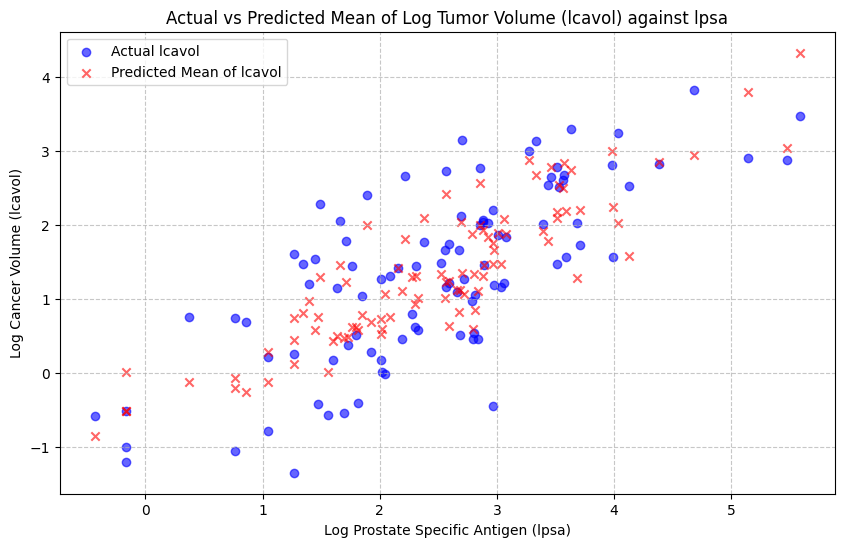

In [11]:
predictions = results.get_prediction(X)

y_pred_mean = predictions.predicted_mean

plt.figure(figsize=(10, 6))

plt.scatter(df['lpsa'], y, color='blue', alpha=0.6, label='Actual lcavol', marker='o')

plt.scatter(df['lpsa'], y_pred_mean, color='red', alpha=0.6, label='Predicted Mean of lcavol', marker='x')

plt.title('Actual vs Predicted Mean of Log Tumor Volume (lcavol) against lpsa')
plt.xlabel('Log Prostate Specific Antigen (lpsa)')
plt.ylabel('Log Cancer Volume (lcavol)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

**(g)**
Both the actual values (blue dots) and predicted values (red crosses) exhibit a clear, strong positive upward trend as `lpsa` increases. This visualizes the highly significant positive coefficient of `lpsa` derived earlier, confirming it as a dominant driver of `lcavol`.

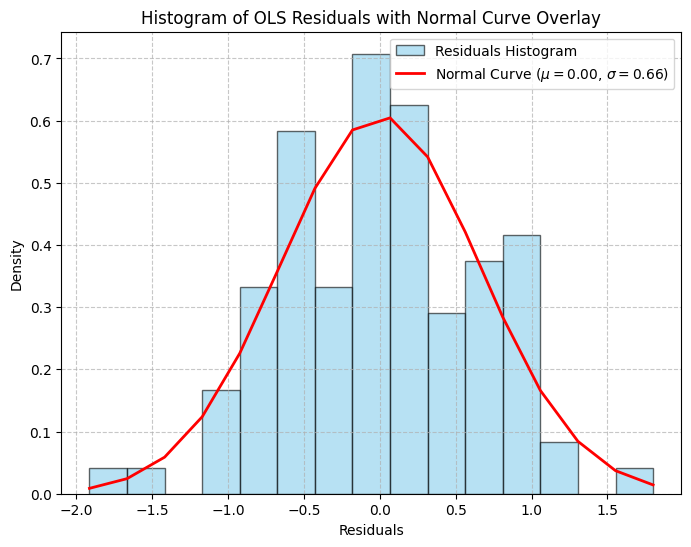

In [12]:
residuals = results.resid

plt.figure(figsize=(8, 6))

count, bins, ignored = plt.hist(residuals, bins=15, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Residuals Histogram')

mu, std = stats.norm.fit(residuals)
p = stats.norm.pdf(bins, mu, std)
plt.plot(bins, p, 'r-', linewidth=2, label=rf'Normal Curve ($\mu={mu:.2f}$, $\sigma={std:.2f}$)')

plt.title('Histogram of OLS Residuals with Normal Curve Overlay')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

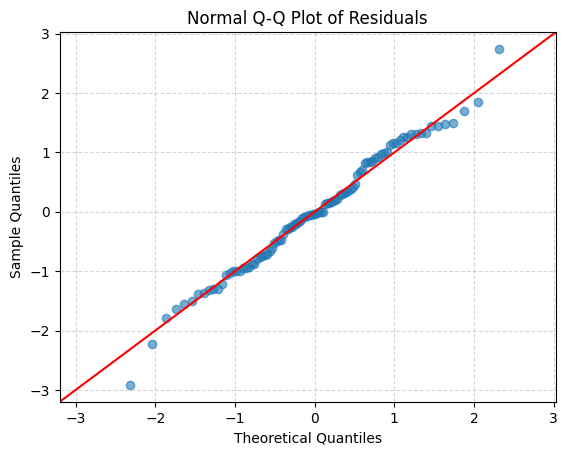

Residual Sum of Squares (RSS): 41.8141


In [13]:
residuals = results.resid

fig = sm.qqplot(residuals, line='45', fit=True, marker='o', alpha=0.6)
plt.title('Normal Q-Q Plot of Residuals')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

rss_statsmodels = results.ssr

print(f"Residual Sum of Squares (RSS): {rss_statsmodels:.4f}")

**(h)**
From the Q-Q Plot we find that the blue dots nearly lies on the red line, which shows that the residuals are normally distributed. What's more, the RSS equals to 41.8141.

In [14]:
X_reduced = X.drop(columns=['lpsa', 'lcp'])

model_reduced = sm.OLS(y, X_reduced)
results_reduced = model_reduced.fit()

print(results_reduced.summary())

print(f"Original RSS: {results.ssr:.4f}")
print(f"Reduced Model RSS: {results_reduced.ssr:.4f}")

                            OLS Regression Results                            
Dep. Variable:                 lcavol   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     8.390
Date:                Mon, 23 Feb 2026   Prob (F-statistic):           2.11e-08
Time:                        21:27:10   Log-Likelihood:                -125.58
No. Observations:                  97   AIC:                             269.2
Df Residuals:                      88   BIC:                             292.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight        0.5850      0.259      2.257      0.0

**(i)**
Removing the predictors `lpsa` and `lcp` profoundly degrades the predictive power of the multiple linear regression model. By removing them, the model's $R^2$ and Adjusted $R^2$ experience a severe drop (0.65 to 0.38). This indicates a massive loss in the proportion of variance in lcavol that the model can explain. Consequently, the Residual Sum of Squares (RSS) increases significantly.

Moreover, because the remaining variables may be correlated with the omitted ones (`lpsa` and `lcp`), their estimated coefficients ($\hat{\beta}$) and $p$-values will shift. Variables that previously appeared non-significant might now absorb some of the predictive weight left behind, appearing falsely significant due to omitted variable bias.

## Exercise 3: Best subset selection

**(a),(b)** We evaluated all $\binom{8}{k}$ possible models for each size $k \in \{0, \dots, 8\}$. For $k=2$, the model that minimizes RSS consists of the predictors lpsa and lcp. As illustrated in the plotted curve, the minimum RSS strictly decreases as the number of predictors $k$ increases, eventually reaching its absolute minimum at $k=8$ when all predictors are included.

=== Part (a) ===
For k=2，the model has the minimum RSS is: ('lcp', 'lpsa')
It's RSS value is: 47.2781

=== Part (b) ===
k=0: Min RSS = 133.3590, Predictors = ()
k=1: Min RSS = 61.4209, Predictors = ('lpsa',)
k=2: Min RSS = 47.2781, Predictors = ('lcp', 'lpsa')
k=3: Min RSS = 46.2378, Predictors = ('age', 'lcp', 'lpsa')
k=4: Min RSS = 44.8784, Predictors = ('age', 'lbph', 'lcp', 'lpsa')
k=5: Min RSS = 43.6900, Predictors = ('age', 'lcp', 'gleason', 'pgg45', 'lpsa')
k=6: Min RSS = 42.1739, Predictors = ('age', 'lbph', 'lcp', 'gleason', 'pgg45', 'lpsa')
k=7: Min RSS = 41.8154, Predictors = ('age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45', 'lpsa')
k=8: Min RSS = 41.8141, Predictors = ('lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45', 'lpsa')


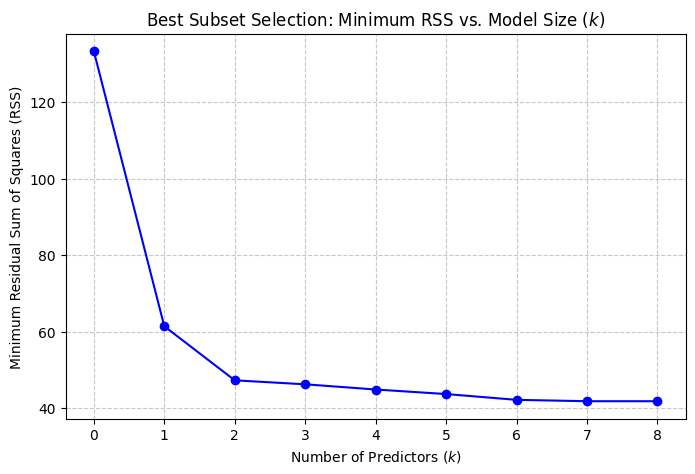

In [15]:
from itertools import combinations

y = df["lcavol"]
predictors = [c for c in df.columns if c != "lcavol"]
X_base = df[predictors]

rss_results = []

# build models for all possible combinations for k = 0,..,8 of predictors and calculate RSS for each model
for k in range(0, len(predictors) + 1):
    for pack in combinations(predictors, k):
        X = df[list(pack)]

        if ('svi' in pack) or ('gleason' in pack):
            X = pd.get_dummies(X, dtype=np.float64)
        if 'svi' in pack:
            X = X.drop(columns=['svi_0'])
        if 'gleason' in pack:
            X = X.drop(columns=['gleason_6'])

        X = sm.add_constant(X)

        fit = sm.OLS(y, X).fit()
        rss = float(np.sum(fit.resid ** 2))

        rss_results.append({"k": k, "predictors": pack, "RSS": rss})

rss_table = pd.DataFrame(rss_results).sort_values(["k", "RSS"]).reset_index(drop=True)

best_models = rss_table.loc[rss_table.groupby("k")["RSS"].idxmin()].sort_values("k")

print("=== Part (a) ===")
print(f"For k=2，the model has the minimum RSS is: {best_models.iloc[2]['predictors']}")
print(f"It's RSS value is: {best_models.iloc[2]['RSS']:.4f}\n")

print("=== Part (b) ===")
for k in range(9):
    print(f"k={k}: Min RSS = {best_models.iloc[k]['RSS']:.4f}, Predictors = {best_models.iloc[k]['predictors']}")

plt.figure(figsize=(8, 5))
plt.plot(range(9), best_models['RSS'], marker='o', color='b', linestyle='-')
plt.title('Best Subset Selection: Minimum RSS vs. Model Size ($k$)')
plt.xlabel('Number of Predictors ($k$)')
plt.ylabel('Minimum Residual Sum of Squares (RSS)')
plt.xticks(range(9))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**(c)**
No, minimizing RSS is not well suited for selecting the optimal size $k$ for regression models. Mathematically, when we increase the size of the k-model by adding more predictors, RSS will always decrease monotonically, because a more complex model includes a simple one as a special case and can better match the training data, including the noise contained in this data. If we rely only on RSS minimization when choosing $k$, then the most complex model will always be chosen (in this case, $k=8$). However, this model is very susceptible to overfitting. Despite the fact that it works great with training data, its variance increases significantly, which leads to poor generalization capabilities for test data.



## Exercise 4: Split-Validation

**(a)**
- It works by randomly partitioning our initial dataset for 2 parts: **training set** and **testing set**. We fit out model on training set and evaluate on the testing set.
- It does not suffer from the issue raised in Exercise 3(c) because evaluating the model on unseen data provides an unbiased estimate of its generalization performance. While training error invariably decreases as model complexity increases, the testing error will typically decrease initially but eventually start to increase if the model overfits, so at the end we can find the best point.

**(b)**
We use the following code to partition and plot the error curve.

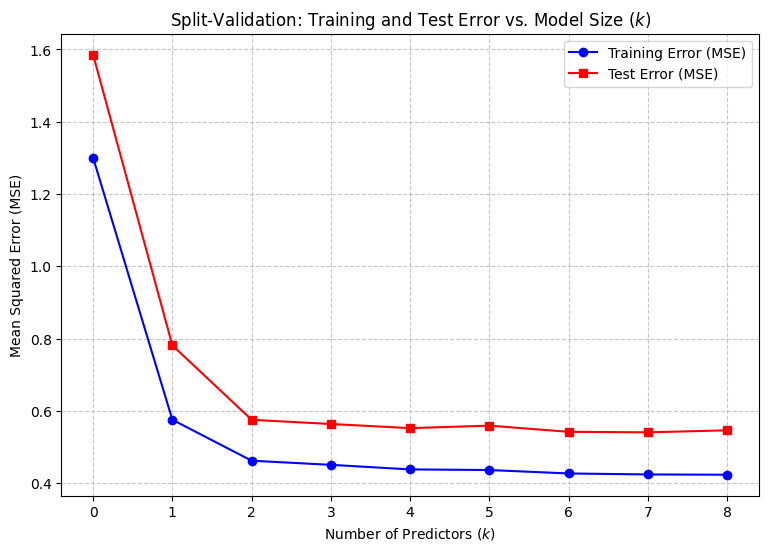

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=0.3, random_state=42)

train_errors = []
test_errors = []

for k in range(9):
    best_subset = list(best_models.iloc[k]['predictors'])
    
    if k == 0:
        X_train_k = pd.DataFrame(1.0, index=y_train.index, columns=['const'])
        X_test_k = pd.DataFrame(1.0, index=y_test.index, columns=['const'])
    else:
        X_train_k = sm.add_constant(X_train[best_subset])
        X_test_k = sm.add_constant(X_test[best_subset])
    
    model_k = sm.OLS(y_train, X_train_k).fit()
    
    y_train_pred = model_k.predict(X_train_k)
    y_test_pred = model_k.predict(X_test_k)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)

plt.figure(figsize=(9, 6))
plt.plot(range(9), train_errors, label='Training Error (MSE)', marker='o', color='blue')
plt.plot(range(9), test_errors, label='Test Error (MSE)', marker='s', color='red')
plt.title('Split-Validation: Training and Test Error vs. Model Size ($k$)')
plt.xlabel('Number of Predictors ($k$)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(range(9))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**(c)**

Based on the graphs, we think the best model is the model with 6 predictors, since it is the minimum value of the test error.
The parameters we used are `age`, `lbph`, `lcp`, `lpsa`, `gleason`, `pgg45` from the previous questions.

**(d)**

The main limitation of a single split-validation, especially on small datasets like this prostate cancer dataset ($n=97$), is its high sensitivity to how the data is randomly partitioned. To address this instability, we can use $K$-Fold Cross-Validation (CV). In $K$-Fold CV, the dataset is divided into $K$ roughly equal folds. The model is trained $K$ times, each time using $K-1$ folds for training and the remaining $1$ fold for testing. The final prediction error is the average of the errors from all $K$ iterations. This approach maximizes the use of available data for both training and validation, significantly reducing the variance of the error estimate.

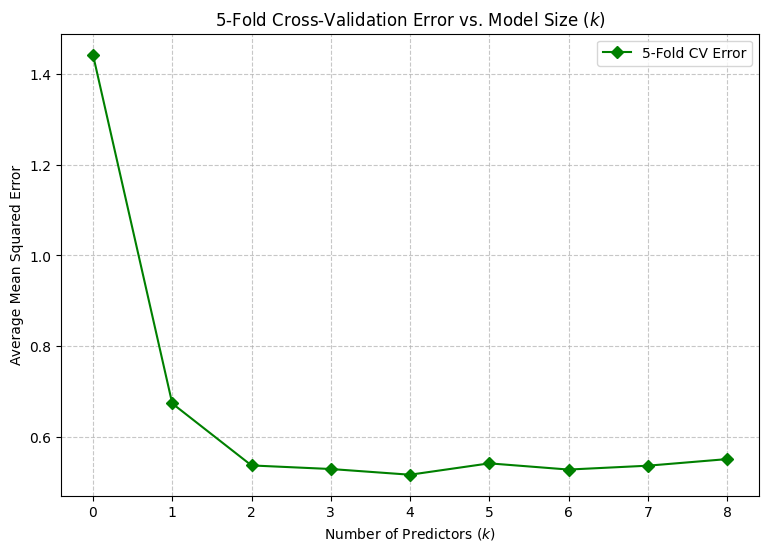

Based on 5-Fold CV, the optimal model size is k = 4


In [17]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_errors = []

for k in range(9):
    best_subset = list(best_models.iloc[k]["predictors"])
    fold_errors = []
    
    for train_index, test_index in kf.split(X_base):
        X_tr, X_te = X_base.iloc[train_index], X_base.iloc[test_index]
        y_tr, y_te = y.iloc[train_index], y.iloc[test_index]
        
        if k == 0:
            X_tr_k = pd.DataFrame(1.0, index=y_tr.index, columns=['const'])
            X_te_k = pd.DataFrame(1.0, index=y_te.index, columns=['const'])
        else:
            X_tr_k = sm.add_constant(X_tr[best_subset])
            X_te_k = sm.add_constant(X_te[best_subset])
            
        model_cv = sm.OLS(y_tr, X_tr_k).fit()
        preds = model_cv.predict(X_te_k)
        mse = mean_squared_error(y_te, preds)
        fold_errors.append(mse)
        
    cv_errors.append(np.mean(fold_errors))

plt.figure(figsize=(9, 6))
plt.plot(range(9), cv_errors, label='5-Fold CV Error', marker='D', color='green')
plt.title('5-Fold Cross-Validation Error vs. Model Size ($k$)')
plt.xlabel('Number of Predictors ($k$)')
plt.ylabel('Average Mean Squared Error')
plt.xticks(range(9))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print(f"Based on 5-Fold CV, the optimal model size is k = {np.argmin(cv_errors)}")

## Exercise5: Conclusion

Based on the comprehensive analysis conducted throughout this lab, We can conclude that the optimal model to predict the log prostate tumor volume (lcavol) is the subset model consisting of exactly **$k=4$ predictors** with parameters `age`, `lbph`, `lcp`, `lpsa`.

Moreover, this result tell us two thing.
- When searching for the best subset (Exercise 3), relying strictly on the RSS misleadingly favored the most complex model ($k=8$). This highlighted the danger of overfitting.
- To properly estimate out-of-sample performance, we employed other techniques. We first attempted to use the split-validation method. The single train-test shows the answer is 6, but this algorithm can be affected by the way of splitting since we have such a small samples. The implementation of 5-Fold Cross-Validation successfully addressed the instability of split-validation. As illustrated in the final CV plot, the average Mean Squared Error drops sharply initially and reaches its global minimum at $k=4$. Adding more predictors beyond this point causes the CV error to gently rise again, signifying the onset of overfitting.